In [ ]:
import pandas as pd
import frust.vis as vis

# Values from DFT run only

In [93]:
conversion_factor       =  627.509474
dimer_dft               = -834847.294
HBpin_dft               = -258305.91711374212
H2_dft                  = -737.1088023791428

# tests
#dimer_dft = -782.828844 * conversion_factor # The methyl dimer
#dimer_dft = -782.848448 * conversion_factor # The bridged methyl dimer

dimer_xtb               = -97.050557670754 * conversion_factor
HBpin_xtb               = -28.947535986441 * conversion_factor
H2_xtb                  = -0.9826859256890 * conversion_factor

df_lig = pd.read_parquet(
    "output_files/font_ligs.parquet",
    columns=[
        "ligand_name",
        "xtb-gfn-opt-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-gibbs_energy",
        "orca-wB97X-D3-6-31+G**-NoSym-electronic_energy",
    ],
)

key = "ligand_name"
df_lig = df_lig.rename(columns=lambda c: c if c == key else f"{c}_lig")

# TS1

In [94]:
df_ts1 = pd.read_parquet("output_files/17_ts1_font_DFT.parquet")
df_ts1.drop(columns=[col for col in df_ts1.columns if "vibs" in col], inplace=True)

df = df_ts1.merge(df_lig, on='ligand_name', how='left', suffixes=('_ts', '_lig'))
energy_cols = [col for col in df.columns if 'energy' in col]
df[energy_cols] = df[energy_cols] * conversion_factor

In [95]:
df["lig_G_corr"] = df["orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig"] - df["orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig"]
df["lig_G"] = df["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig"] + df["lig_G_corr"]

df["G_corr"] = df["DFT-wB97X-D3-6-31G**-OptTS-gibbs_energy"] - df["DFT-wB97X-D3-6-31G**-OptTS-electronic_energy"]
df["G_ts3"] = df["DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + df["G_corr"]

df["dG"] = (2 * (df["G_ts3"] - df["lig_G"]) - dimer_dft) / 2
df["dE"] = (2 * (df["xtb-gfn-opt-electronic_energy"] - df["xtb-gfn-opt-electronic_energy_lig"]) - dimer_xtb) / 2
# Trying with SPs
#df["dE"] = (2 * (df["DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"] - df["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig"]) - (-835242.3030976757)) / 2

df_ts1_e = df[["ligand_name", "rpos", "dG"]]
#df.sort_values(by="ligand_name")

[INFO]: Linear relation: y = 0.67x - 7.37
[INFO]: Error relationship:  y = 1x + 16.02


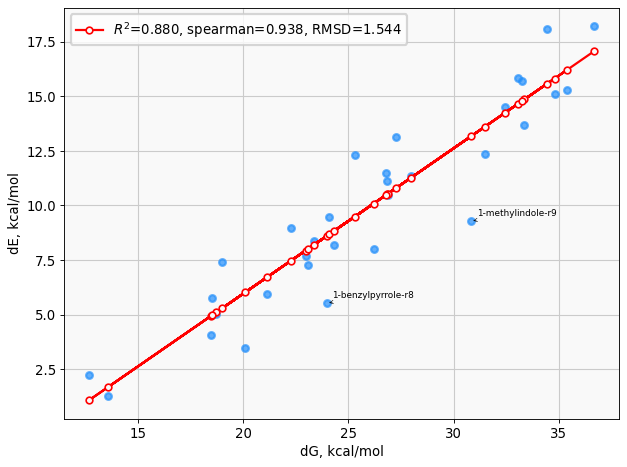

In [96]:
vis.plot_regression_outliers(df)

In [97]:
df_dGs = df[["ligand_name", "rpos", "dG"]].rename(columns={"dG": "dG_ts1"})

# TS2

In [98]:
df_ts2 = pd.read_parquet("output_files/18_ts2_font_DFT.parquet")
df_ts2.drop(columns=[col for col in df_ts2.columns if "vibs" in col], inplace=True)

df = df_ts2.merge(df_lig, on='ligand_name', how='left', suffixes=('_ts', '_lig'))
energy_cols = [col for col in df.columns if 'energy' in col]
df[energy_cols] = df[energy_cols] * conversion_factor

In [99]:
df

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,coords_embedded,energy_uff,xtb-gfnff-opt-electronic_energy,...,DFT-wB97X-D3-6-31G**-OptTS-electronic_energy,DFT-wB97X-D3-6-31G**-OptTS-gibbs_energy,DFT-wB97X-D3-6-31G**-OptTS-normal_termination,DFT-wB97X-D3-6-31G**-OptTS-opt_coords,DFT-SP-wB97X-D3-6-31+G**-NoSym-normal_termination,DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy,xtb-gfn-opt-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig
0,TS2(1-benzylpyrrole_rpos(3)),1-benzylpyrrole,3,"[10, 17, 39, 41, 40, 45]",3,N1(CC2=CC=CC=C2)C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[0.8306558898355806, -4.845226925542764, -1.0...",619635.331013,-7100.620880,...,-719069.845732,-718751.041258,True,"[[0.582841, -4.899913, -1.058193], [0.051187, ...",True,-719103.360247,-20123.336692,-301459.533212,-301358.749690,-301482.394037
1,TS2(1-benzylpyrrole_rpos(4)),1-benzylpyrrole,4,"[10, 17, 39, 41, 40, 46]",63,N1(CC2=CC=CC=C2)C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.9965824996625994, -0.5047736150526108, -4....",565865.855025,-7103.048878,...,-719069.084589,-718750.112839,True,"[[2.463888, -0.716796, -3.754019], [1.603561, ...",True,-719104.030466,-20123.336692,-301459.533212,-301358.749690,-301482.394037
2,TS2(1-benzylpyrrole_rpos(5)),1-benzylpyrrole,5,"[10, 17, 39, 41, 40, 47]",2,N1(CC2=CC=CC=C2)C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.1329141561993357, -0.6892201001868028, 4.5...",519881.566675,-7099.263951,...,-719066.604594,-718748.161297,True,"[[0.288999, 0.022835, 5.111386], [-0.282299, -...",True,-719102.130943,-20123.336692,-301459.533212,-301358.749690,-301482.394037
3,TS2(1-benzylpyrrole_rpos(8)),1-benzylpyrrole,8,"[10, 17, 39, 41, 40, 50]",1,N1(CC2=CC=CC=C2)C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[-1.1480160714164116, -3.376219908025515, 4.4...",548102.456848,-7112.657825,...,-719076.554948,-718757.640443,True,"[[-1.294287, -3.43532, 4.26828], [-1.418135, -...",True,-719109.730063,-20123.336692,-301459.533212,-301358.749690,-301482.394037
4,TS2(1-benzylpyrrole_rpos(9)),1-benzylpyrrole,9,"[10, 17, 39, 41, 40, 51]",36,N1(CC2=CC=CC=C2)C=CC=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[-1.549791844422959, 1.5753976765043762, -5.0...",537262.400023,-7103.465808,...,-719071.072475,-718752.853524,True,"[[-1.685717, 1.421655, -4.883105], [-1.763578,...",True,-719106.157359,-20123.336692,-301459.533212,-301358.749690,-301482.394037
5,TS2(1-methylindole_rpos(4)),1-methylindole,4,"[10, 17, 39, 41, 40, 46]",42,CN1C2=C(C=CC=C2)C=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.059550011170156, -4.317172911126244, 1.638...",493470.532745,-6600.943994,...,-670507.612470,-670210.366787,True,"[[0.804717, -4.369058, 1.866188], [0.244355, -...",True,-670538.902050,-16809.979099,-252901.357120,-252821.433787,-252919.093314
6,TS2(1-methylindole_rpos(5)),1-methylindole,5,"[10, 17, 39, 41, 40, 47]",33,CN1C2=C(C=CC=C2)C=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[0.1273455290206237, -4.769603691282434, 1.61...",538209.757355,-6599.878883,...,-670507.506678,-670209.769115,True,"[[0.084291, -4.7046, 1.680984], [-0.345243, -3...",True,-670538.832994,-16809.979099,-252901.357120,-252821.433787,-252919.093314
7,TS2(1-methylindole_rpos(6)),1-methylindole,6,"[10, 17, 39, 41, 40, 48]",5,CN1C2=C(C=CC=C2)C=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.6738452417221872, 3.0437207083402327, -3.2...",548053.358708,-6600.535977,...,-670508.084473,-670210.605679,True,"[[1.534806, 2.970508, -3.318819], [0.81293, 2....",True,-670539.276089,-16809.979099,-252901.357120,-252821.433787,-252919.093314
8,TS2(1-methylindole_rpos(7)),1-methylindole,7,"[10, 17, 39, 41, 40, 49]",3,CN1C2=C(C=CC=C2)C=C1,"[H, C, C, C, C, H, C, H, C, H, B, H, H, H, H, ...","[[1.042344950278138, -5.052778461755088, 0.414...",535940.718933

In [100]:
df["lig_G_corr"] = df["orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig"] - df["orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig"]
df["lig_G"] = df["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig"] + df["lig_G_corr"]

df["G_corr"] = df["DFT-wB97X-D3-6-31G**-OptTS-gibbs_energy"] - df["DFT-wB97X-D3-6-31G**-OptTS-electronic_energy"]
df["G_ts3"] = df["DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + df["G_corr"]

df["dG"] = (2 * (df["G_ts3"] - df["lig_G"]) - dimer_dft) / 2
df["dE"] = (2 * (df["xtb-gfn-opt-electronic_energy"] - df["xtb-gfn-opt-electronic_energy_lig"]) - dimer_xtb) / 2
# Trying with SPs
#df["dE"] = (2 * (df["DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy"] - df["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig"]) - (-835242.3030976757)) / 2

#df.sort_values(by="ligand_name")

[INFO]: Linear relation: y = 0.72x + 2.80
[INFO]: Error relationship:  y = 1x + 2.29


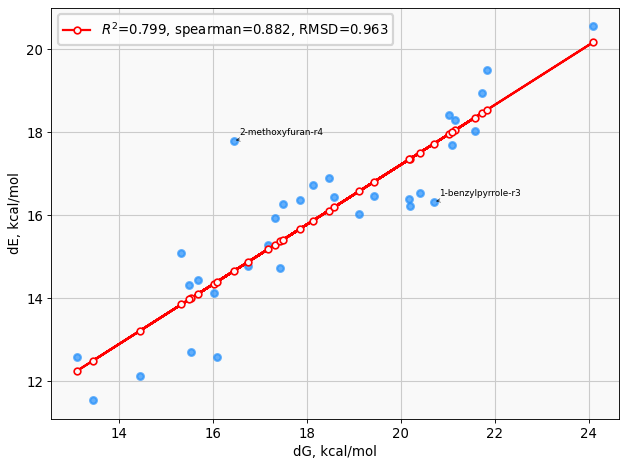

In [101]:
vis.plot_regression_outliers(df)

In [102]:
df_dGs = df[["ligand_name", "rpos", "dG"]].rename(columns={"dG": "dG_ts2"})
df_dGs.to_csv("misc/DFT_dGs_ts2_font.csv")

# TS3

In [128]:
df_ts3 = pd.read_parquet("output_files/19_ts3_font_DFT.parquet")
df_ts3_temp = df_ts3[["DFT-pre-Opt-wB97X-D3-6-31G**-Freq-gibbs_energy", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"]]
df_ts3.drop(columns=["DFT-pre-Opt-wB97X-D3-6-31G**-Freq-gibbs_energy", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"], inplace=True)


df_ts3_redo = pd.read_parquet("output_files/misc/ts3_redos.parquet")
df_ts3_redo.rename(
    columns={
        "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy",
        "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-normal_termination": "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-normal_termination",
        "DFT-pre-Opt-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-electronic_energy",
        "DFT-pre-Opt-wB97X-D3-6-31G**-NoSym-normal_termination": "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-normal_termination",
        "DFT-pre-Opt-wB97X-D3-6-31G**-NoSym-opt_coords": "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-opt_coords"},
    inplace=True)
#df_ts3_redo = df_ts3_redo[[col for col in df_ts3_redo.columns if "vibs" not in col]]

df_ts3 = pd.concat([df_ts3, df_ts3_redo]).drop_duplicates(subset="custom_name", keep="last").reset_index(drop=True)


In [140]:
df_ts3 = pd.read_parquet("output_files/19_ts3_font_DFT.parquet").drop(columns=["DFT-wB97X-D3-6-31G**-OptTS-vibs", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"])
# df_ts3 = df_ts3.drop(columns=["DFT-wB97X-D3-6-31G**-OptTS-vibs"])

df = df_ts3.merge(df_lig, on='ligand_name', how='left', suffixes=('_ts', '_lig'))
energy_cols = [col for col in df.columns if 'energy' in col]
df[energy_cols] = df[energy_cols] * conversion_factor
coords_cols = [col for col in df.columns if 'coords' in col]
df = df.drop(columns=coords_cols)

In [141]:
df["lig_G_corr"] = df["orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig"] - df["orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig"]
df["lig_G"] = df["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig"] + df["lig_G_corr"]

df["G_corr"] = df["DFT-wB97X-D3-6-31G**-OptTS-gibbs_energy"] - df["DFT-wB97X-D3-6-31G**-OptTS-electronic_energy"]
df["G_ts3"] = df["DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + df["G_corr"]

df["dG"] = (2 * (df["G_ts3"] - df["lig_G"] - HBpin_dft + H2_dft) - dimer_dft) / 2
df["dE"] = (2 * (df["xtb-gfn-opt-electronic_energy"] - df["xtb-gfn-opt-electronic_energy_lig"] - HBpin_xtb + H2_xtb) - dimer_xtb) / 2

df_dGs = df_dGs.merge(df[["ligand_name", "rpos", "dG"]].rename(columns={"dG": "dG_ts3"}))

df_ts3_e = df[["ligand_name", "rpos", "dG"]]
df.sort_values(by=["ligand_name", "rpos"])

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,energy_uff,xtb-gfnff-opt-electronic_energy,xtb-gfnff-opt-normal_termination,...,xtb-gfn-opt-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig,lig_G_corr,lig_G,G_corr,G_ts3,dG,dE
0,TS3(1-methylindole_rpos(5)),1-methylindole,5,"[10, 12, 11, 41, 40, 67]",182,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.685075e+06,-8486.791929,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,403.931579,-9.278113e+05,20.373574,19.661232
1,TS3(1-methylindole_rpos(7)),1-methylindole,7,"[10, 12, 11, 41, 40, 69]",81,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",5.654300e+06,-8482.758617,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,406.698569,-9.278062e+05,25.450590,19.089757
2,TS3(1-methylindole_rpos(8)),1-methylindole,8,"[10, 12, 11, 41, 40, 70]",158,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.416620e+06,-8478.403529,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.936139,-9.278145e+05,17.142981,15.797896
3,TS3(1-methylindole_rpos(9)),1-methylindole,9,"[10, 12, 11, 41, 40, 71]",199,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.298833e+06,-8485.400998,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.993218,-9.278122e+05,19.421268,14.840246
4,TS3(1-methylpyrrole_rpos(2)),1-methylpyrrole,2,"[10, 12, 11, 41, 40, 64]",159,CN1C=CC=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",5.884121e+06,-7611.834343,True,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,377.086478,-8.314464e+05,17.407736,14.775664
5,TS3(1-methylpyrrole_rpos(3)),1-methylpyrrole,3,"[10, 12, 11, 41, 40, 65]",217,CN1C=CC=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",5.072968e+06,-7604.422417,True,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,376.350161,-8.314450e+05,18.856019,18.580886
6,"TS3(2,3-dihydrothieno[3,4-b][1,4]dioxine_rpos(1))","2,3-dihydrothieno[3,4-b][1,4]dioxine",1,"[10, 12, 11, 41, 40, 63]",65,C12=CSC=C1OCCO2,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.843803e+06,-7735.308344,True,...,-17113.307245,-489911.428368,-489859.550703,-489926.763646,51.877665,-489874.885981,377.361817,-1.164853e+06,14.500339,15.289563
7,TS3(2-methoxyfuran_rpos(3)),2-methoxyfuran,3,"[10, 12, 11, 41, 40, 65]",110,COC1=CC=CO1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",4.662037e+06,-7543.885389,True,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,370.759530,-8.910880e+05,16.038213,18.061610
8,TS3(2-methoxyfuran_rpos(4)),2-methoxyfuran,4,"[10, 12, 11, 41, 40, 66]",20,COC1=CC=CO1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.580114e+06,-7548.729221,True,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,371.785657,-8.910838e+05,20.203287,18.865038
9,TS3(2-methoxyfuran_rpos(5)),2-methoxyfuran,5,"[10, 12, 11, 41, 40, 67]",102,COC1=CC=CO1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.645045e+06,-7564.530560,True,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,370.375445,-8.910913e+05,12.663760,14.635726


[INFO]: Linear relation: y = 0.42x + 9.38
[INFO]: Error relationship:  y = 1x + 1.35


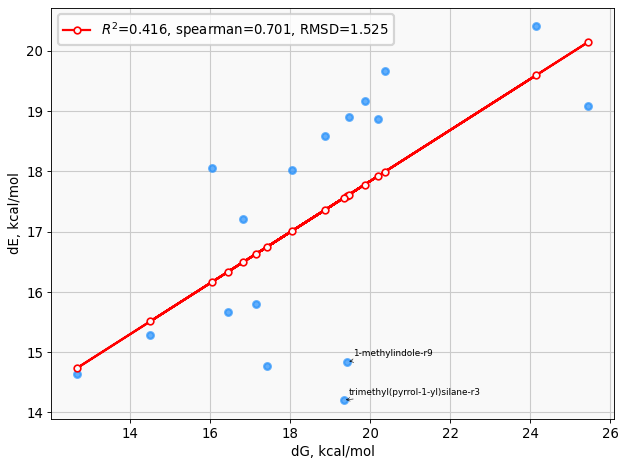

In [142]:
vis.plot_regression_outliers(df)

In [132]:
df_dGs = df[["ligand_name", "rpos", "dG"]].rename(columns={"dG": "dG_ts3"})
df_dGs.to_csv("misc/DFT_dGs_ts3_font.csv")

In [133]:
from frust.utils.analytics import build_annotated_frame
from IPython.display import HTML
_, html = build_annotated_frame(df, energy_col="dG", output_path="TS3_DFT_font_preliminary.html")
HTML(html)

# TS4 

In [134]:
df_ts4 = pd.read_parquet("output_files/20_ts4_font_DFT.parquet")
df_ts4_temp = df_ts4[["DFT-pre-Opt-wB97X-D3-6-31G**-Freq-gibbs_energy", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"]]
df_ts4.drop(columns=["DFT-pre-Opt-wB97X-D3-6-31G**-Freq-gibbs_energy", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"], inplace=True)

df_ts4_redo = pd.read_parquet("output_files/misc/ts4_redos.parquet")
df_ts4_redo.rename(
    columns={
        "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy",
        "DFT-pre-SP-wB97X-D3-6-31G**-NoSym-normal_termination": "DFT-pre-SP-wB97X-D3-6-31+G**-NoSym-normal_termination",
        "DFT-pre-Opt-wB97X-D3-6-31G**-NoSym-electronic_energy": "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-electronic_energy",
        "DFT-pre-Opt-wB97X-D3-6-31G**-NoSym-normal_termination": "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-normal_termination",
        "DFT-pre-Opt-wB97X-D3-6-31G**-NoSym-opt_coords": "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-opt_coords"},
    inplace=True)
#df_ts4_redo = df_ts4_redo[[col for col in df_ts4_redo.columns if "vibs" not in col]]

df_ts4 = pd.concat([df_ts4, df_ts4_redo]).drop_duplicates(subset="custom_name", keep="last").reset_index(drop=True)
df_ts4.sort_values(by=["ligand_name", "rpos"], inplace=True)

In [135]:
df_ts4 = pd.read_parquet("output_files/20_ts4_font_DFT.parquet").drop(columns=["DFT-wB97X-D3-6-31G**-OptTS-vibs", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"])
# df_ts4.drop(columns=["DFT-wB97X-D3-6-31G**-OptTS-vibs"], inplace=True)

df = df_ts4.merge(df_lig, on='ligand_name', how='left', suffixes=('_ts', '_lig'))
energy_cols = [col for col in df.columns if 'energy' in col]
df[energy_cols] = df[energy_cols] * conversion_factor
coords_cols = [col for col in df.columns if 'coords' in col]
df = df.drop(columns=coords_cols)

In [136]:
df["lig_G_corr"] = df["orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig"] - df["orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig"]
df["lig_G"] = df["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig"] + df["lig_G_corr"]

df["G_corr"] = df["DFT-wB97X-D3-6-31G**-OptTS-gibbs_energy"] - df["DFT-wB97X-D3-6-31G**-OptTS-electronic_energy"]
df["G_ts3"] = df["DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + df["G_corr"]

df["dG"] = (2 * (df["G_ts3"] - df["lig_G"] - HBpin_dft + H2_dft) - dimer_dft) / 2
df["dE"] = (2 * (df["xtb-gfn-opt-electronic_energy"] - df["xtb-gfn-opt-electronic_energy_lig"] - HBpin_xtb + H2_xtb) - dimer_xtb) / 2

df_dGs = df_dGs.merge(df[["ligand_name", "rpos", "dG"]].rename(columns={"dG": "dG_ts4"}))

df_ts4_e = df[["ligand_name", "rpos", "dG"]]
df.sort_values(by="ligand_name")

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,energy_uff,xtb-gfnff-opt-electronic_energy,xtb-gfnff-opt-normal_termination,...,xtb-gfn-opt-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig,lig_G_corr,lig_G,G_corr,G_ts3,dG,dE
0,TS4(1-methylindole_rpos(4)),1-methylindole,4,"[11, 10, 12, 61, 55, 66]",31,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",2.196064e+06,-8484.118149,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,403.424347,-9.278040e+05,27.596534,18.725639
1,TS4(1-methylindole_rpos(5)),1-methylindole,5,"[11, 10, 12, 61, 55, 67]",44,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",2.447477e+06,-8484.720714,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,403.855096,-9.278078e+05,23.862665,18.098755
2,TS4(1-methylindole_rpos(6)),1-methylindole,6,"[11, 10, 12, 61, 55, 68]",123,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",3.145564e+06,-8484.626855,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.080097,-9.278073e+05,24.350410,17.218500
3,TS4(1-methylindole_rpos(7)),1-methylindole,7,"[11, 10, 12, 61, 55, 69]",141,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",3.809554e+06,-8483.909998,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.829152,-9.278051e+05,26.486184,17.304369
4,TS4(1-methylindole_rpos(8)),1-methylindole,8,"[11, 10, 12, 61, 55, 70]",53,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",3.317619e+06,-8485.359025,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.617016,-9.278191e+05,12.565253,11.024149
5,TS4(1-methylindole_rpos(9)),1-methylindole,9,"[11, 10, 12, 61, 55, 71]",18,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",1.937271e+06,-8487.319618,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.074331,-9.278103e+05,21.289363,11.977559
6,TS4(1-methylpyrrole_rpos(2)),1-methylpyrrole,2,"[11, 10, 12, 61, 55, 64]",112,CN1C=CC=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",1.902866e+06,-7611.926176,True,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,376.542226,-8.314490e+05,14.818576,9.877112
7,TS4(1-methylpyrrole_rpos(3)),1-methylpyrrole,3,"[11, 10, 12, 61, 55, 65]",88,CN1C=CC=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",2.495056e+06,-7609.248743,True,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,376.114280,-8.314477e+05,16.070487,13.642221
8,"TS4(2,3-dihydrothieno[3,4-b][1,4]dioxine_rpos(1))","2,3-dihydrothieno[3,4-b][1,4]dioxine",1,"[11, 10, 12, 61, 55, 63]",45,C12=CSC=C1OCCO2,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",2.948850e+06,-7731.282145,True,...,-17113.307245,-489911.428368,-489859.550703,-489926.763646,51.877665,-489874.885981,376.435914,-1.164851e+06,15.984050,12.596208
11,TS4(2-methoxyfuran_rpos(5)),2-methoxyfuran,5,"[11, 10, 12, 61, 55, 67]",100,COC1=CC=CO1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",3.159229e+06,-7558.217587,True,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,370.316180,-8.910926e+05,11.436219,15.064066


[INFO]: Linear relation: y = 0.47x + 5.98
[INFO]: Error relationship:  y = 1x + 4.26


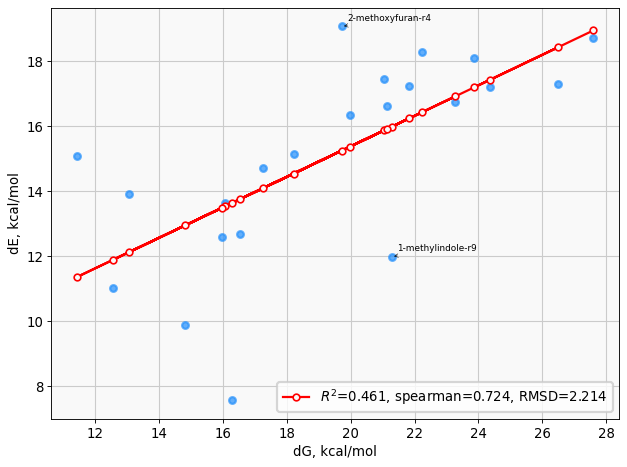

In [137]:
vis.plot_regression_outliers(df)

In [138]:
df_dGs = df[["ligand_name", "rpos", "dG"]].rename(columns={"dG": "dG_ts4"})
df_dGs.to_csv("misc/DFT_dGs_ts4_font.csv")

In [139]:
from frust.utils.analytics import build_annotated_frame
from IPython.display import HTML
_, html = build_annotated_frame(df, energy_col="dG", output_path="TS4_DFT_font_preliminary.html")
HTML(html)